# Statistika Deskriptif dan Exploratory Data Analysis

Pada bagian ini kita akan melakukan beberapa hal:
- Pengecekan Missing Values dan Cara menanganinya
- Analisis Statistika Deskriptif
- Exploratory Data Analysis

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(matplotlib.__version__)

3.7.1


# Data Loading

Kita akan menggunakan dataset dari kaggle melalui kaggle API. Dataset yang digunakan, yaitu [Loan Status Prediction - Kaggle](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction)

In [ ]:
!mkdir ~/.kaggle #buat bikin direktori (folder)

In [ ]:
!cp '/content/kaggle.json' ~/.kaggle

In [ ]:
# !chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bhavikjikadara/loan-status-prediction

  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 8.30MB/s]


In [ ]:
!unzip -q /content/loan-status-prediction.zip

replace loan_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
!unzip /content/loan-status-prediction.zip

Archive:  /content/loan-status-prediction.zip
  inflating: loan_data.csv           


In [ ]:
df= pd.read_csv('/content/loan_data.csv')

In [ ]:
df.shape

(381, 13)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
111,LP001636,Male,Yes,0,Graduate,No,4600,0.0,73.0,180.0,1.0,Semiurban,Y
216,LP002126,Male,Yes,3+,Not Graduate,No,3173,0.0,74.0,360.0,1.0,Semiurban,Y
254,LP002288,Male,Yes,2,Not Graduate,No,2889,0.0,45.0,180.0,0.0,Urban,N
316,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y


# EDA

Pada tahap ini kita akan melakukan analisis sederhana seperti pengecekan missing values, statisitika deskriptif dan pengecekan distribusi data.

In [ ]:
#pengecekan tipe data dan data yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
#Pengecekan Data yang hilang
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df[df['Self_Employed'].isnull()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
13,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
20,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
72,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
75,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y


In [ ]:
#cek baris yang sama-sama memiliki missing values pada 2 kolom berikut
df[df['Self_Employed'].isnull() & df['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Untuk menangani data yang hilang kita dapat melakukan drop atau melakukan imputasi berdasarkan distribusi data.
- Lakukan imputasi dengan mean jika distribusi datanya normal
- Lakukan imputasi dengan median jika distribusi data tidak normal atau terdapat banyak outlier.
- Lakukan imputasi dengan modus jika datanya kategori.

Cara tersebut merupakan cara yang paling sederhana untuk melakukan imputasi.

In [ ]:
#drop baris yang memiliki missing values pada Self_Employed dan Credit_History
df= df.dropna(subset=['Self_Employed','Credit_History','Gender'])

In [ ]:
#cek modus
df['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [ ]:
df['Dependents'].unique()

array(['1', '0', '2', '3+', nan], dtype=object)

In [ ]:
#isi data yang hilang dengan modus
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [ ]:
df[df['Dependents'].isnull()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     10
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Loan_Amount_Term'].skew().round(2)

-2.0

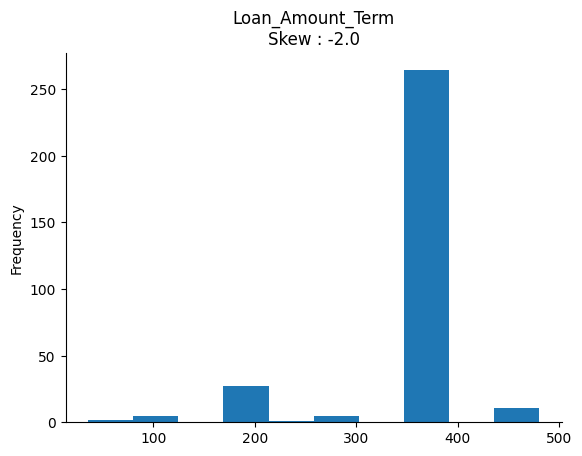

In [ ]:
# cek distribusi data
loan_amount_term= df['Loan_Amount_Term'].skew().round(2)
df['Loan_Amount_Term'].plot(kind='hist', bins=10,
                            title=f"Loan_Amount_Term\nSkew : {loan_amount_term}")
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Imputasi dengan Median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

#cek kembali apakan ada data yang hilang
df[df['Loan_Amount_Term'].isnull()].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#cek summary statisik
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,3614.295385,1260.793600,104.649231,341.981538,0.836923
std,1461.056832,2472.807284,29.008620,67.591088,0.370006
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2600.000000,0.000000,89.000000,360.000000,1.000000
50%,3333.000000,800.000000,110.000000,360.000000,1.000000
75%,4333.000000,1929.000000,128.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,325,325,325,325,325,325,325,325
unique,325,2,2,4,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,257,193,209,238,294,128,227


In [ ]:
df['Married'].value_counts()

Yes    193
No     132
Name: Married, dtype: int64

In [ ]:
df.groupby('Married').size()

Married
No     132
Yes    193
dtype: int64

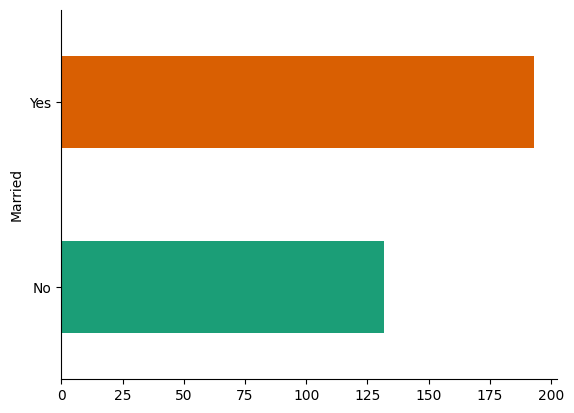

In [ ]:
# @title Married
df.groupby('Married').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

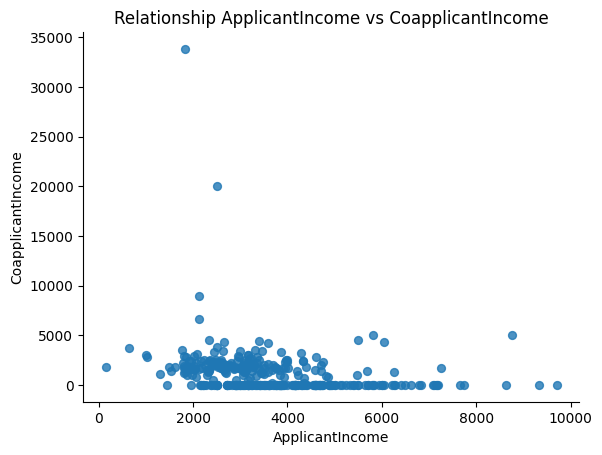

In [ ]:
# @title ApplicantIncome vs CoapplicantIncome
df.plot(kind='scatter', x='ApplicantIncome', y='CoapplicantIncome', s=32, alpha=.8,
        title='Relationship ApplicantIncome vs CoapplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

Dari hasil diatas tampaknya tidak ada korelasi antara `ApplicantIncom` dengan `CoapplicantIncome`

### Skewness and Kurtosis



Pada tahapan ini kita akan mencoba mengecek skewness dan kurtosis pada dataset yang kita gunakan.
- **Skew** adalah kuantifikasi seberapa besar suatu distribusi condong ke kiri atau ke kanan.
- **Kurtosis** mengukur seberapa banyak distribusi di bagian ekor. Ini adalah uji statistik normalitas yang sederhana dan umum digunakan.

Nilai Skewness dan Kurtosis sangat umum dan sangat mudah digunakan untuk menganalisis apakah suatu data berdistribusi normal atau tidak.

Jenis kurtosis:
- **Leptokurtic**: memiliki ekor yang berat dan puncak yang lebih tinggi dibandingkan dengan distribusi normal. Ini menunjukkan bahwa data memiliki lebih banyak outlier atau nilai ekstrim daripada distribusi normal. Nilai kurtosis yang lebih besar dari nol menunjukkan distribusi leptokurtic.

- **Mesokurtic**: memiliki ekor dan puncak yang mirip dengan distribusi normal. Nilai kurtosis adalah nol untuk distribusi normal.

- **Platykurtic**: memiliki ekor yang lebih ringan dan puncak yang lebih datar dibandingkan dengan distribusi normal. Ini menunjukkan lebih sedikit outlier atau nilai ekstrim daripada distribusi normal. Nilai kurtosis yang kurang dari nol menunjukkan distribusi platykurtic.


<img src='https://cdn.analystprep.com/cfa-level-1-exam/wp-content/uploads/2019/08/05085139/page-64.png' width="500" height="400"/>


In [ ]:
print(f"Skewness: {df['ApplicantIncome'].skew()}")
print(f"Kurtosis: {df['ApplicantIncome'].kurtosis()}")

Skewness: 1.1313073437999075
Kurtosis: 1.900877659571389


In [ ]:
print(f"median: {df['ApplicantIncome'].median()}")
print(f"mean: {df['ApplicantIncome'].mean()}")

median: 3333.0
mean: 3614.2953846153846


# Latihan



Selanjutnya silahkan lakukan explorasi lain dengan instruktur anda, seperti melakukan groupby , pengecekan outlier, dll.

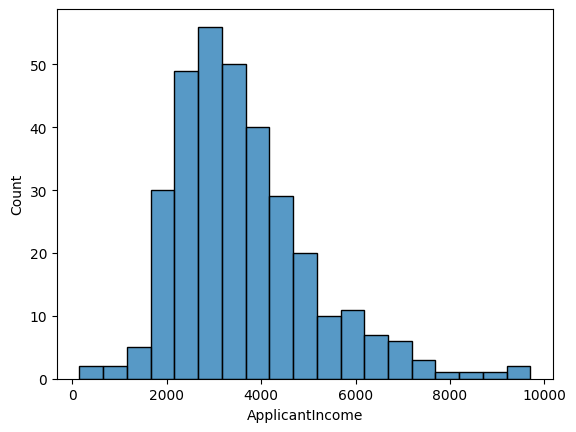

In [ ]:
sns.histplot(df, x='ApplicantIncome');

In [ ]:
# Contoh: Menghitung rata-rata pendapatan pelamar berdasarkan gender
average_income_by_gender = df.groupby('Gender')['ApplicantIncome'].mean()

print("Rata-rata pendapatan berdasarkan gender:")
print(average_income_by_gender)

Rata-rata pendapatan berdasarkan gender:
Gender
Female    3539.661765
Male      3634.042802
Name: ApplicantIncome, dtype: float64


In [ ]:
# Contoh: Menghitung rata-rata pendapatan pelamar berdasarkan gender
average_income_by_gender = df.groupby('Gender')['ApplicantIncome'].median()

print("Rata-rata pendapatan berdasarkan gender:")
print(average_income_by_gender)

Rata-rata pendapatan berdasarkan gender:
Gender
Female    3405.0
Male      3316.0
Name: ApplicantIncome, dtype: float64


Contoh pengecekan outlier dengan **Standar Deviasi**.

In [ ]:
#cek outlier dengan standar deviasi (umumnya digunakan jika distribusi data normal)
avg = df['ApplicantIncome'].mean()
std = df['ApplicantIncome'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper Boundary: {up_bound:.2f}')
print(f'Lower Boundary: {low_bound:.2f}')


outliers = df['ApplicantIncome'][(df['ApplicantIncome'] < low_bound) | (df['ApplicantIncome'] > up_bound)]
no_outliers = df['ApplicantIncome'][(df['ApplicantIncome'] >= low_bound) & (df['ApplicantIncome'] <= up_bound)]

print(f'Percentage of outliers: {len(outliers) * 100 / len(df["ApplicantIncome"]):.2f}%')

Upper Boundary: 7997.47
Lower Boundary: -768.88
Percentage of outliers: 1.23%


Contoh pengecekan outlier dengan IQR. Lengkapi code dibawah ini agar mendapatkan outlier dan data tanpa outlier.

In [ ]:
#cek outlier dengan IQR -Tukey rules (umumnya digunakan jika distribusi data tidak normal)
q1 = df['ApplicantIncome'].quantile(0.25)
q3 = df['ApplicantIncome'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 6932.50
Lower Boundary: 0.50


In [ ]:
outliers = df['ApplicantIncome'][(df['ApplicantIncome'] < low_bound) | (df['ApplicantIncome'] > up_bound)]
no_outliers = df['ApplicantIncome'][(df['ApplicantIncome'] >= low_bound) & (df['ApplicantIncome'] <= up_bound)]

print(f'Percentage of outliers: {len(outliers) * 100 / len(df["ApplicantIncome"]):.2f}%')

Percentage of outliers: 3.69%


In [ ]:
outliers

14     7660
49     7100
99     9323
153    9703
163    7200
235    8750
240    7167
269    7250
275    8624
280    7142
290    7085
294    7740
Name: ApplicantIncome, dtype: int64

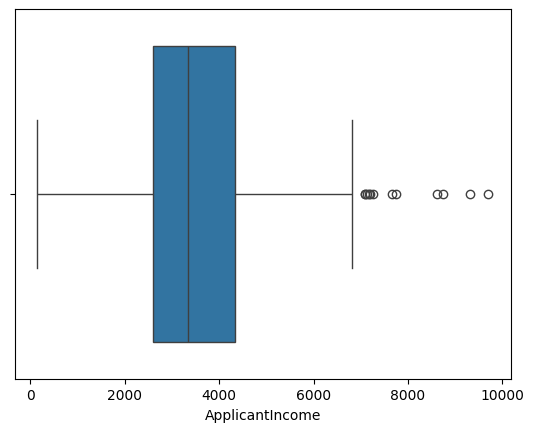

In [ ]:
sns.boxplot(df, x='ApplicantIncome');